In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing

from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import VotingRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('../../../Data/BaseOrdinal2.csv')
ordinal.shape

(2580, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2580, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor()
cb = CatBoostRegressor(verbose=False)

In [6]:
estimators = []
model1 = gb; estimators.append(("GB", model1))
model2 = cb; estimators.append(("CB", model2))

ensemble = VotingRegressor(estimators)

In [7]:
estimators

[('GB', GradientBoostingRegressor()),
 ('CB', <catboost.core.CatBoostRegressor at 0x7fe898bb7550>)]

In [8]:
scoring = {'r2': 'r2',
           'neg_mae': 'neg_mean_absolute_error',
          }

In [9]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, scoring=scoring, 
                                  cv=cv, n_jobs=-1) 
    #print(scores)
    
    df = pd.DataFrame(scores)
    
    return df

In [10]:
dfgb = evaluate_model(gb, X, y)

In [11]:
dfgb = dfgb.rename(columns = {'test_r2':'GB R2'})
dfgb.head(3)

,fit_time,score_time,GB R2,test_neg_mae
0,0.977801,0.006290,0.918785,-14196.146679
1,0.973909,0.005476,0.826486,-14093.304714
2,0.985480,0.002522,0.915860,-14466.446916


In [12]:
dfcb = evaluate_model(cb, X, y)

In [13]:
dfcb = dfcb.rename(columns = {'test_r2':'CB R2'})
dfcb.head(3)

,fit_time,score_time,CB R2,test_neg_mae
0,8.028399,0.007714,0.922817,-12873.361683
1,5.781944,0.006935,0.894705,-12078.089008
2,5.708811,0.009702,0.936007,-12260.969764


In [14]:
dfvote = evaluate_model(ensemble, X, y)

In [15]:
dfvote = dfvote.rename(columns = {'test_r2':'Voting R2'})
dfvote

,fit_time,score_time,Voting R2,test_neg_mae
0,7.283524,0.010626,0.923519,-13114.804051
1,7.111873,0.014390,0.864738,-12676.778743
2,6.831046,0.009613,0.930731,-12933.916832
3,6.690489,0.010812,0.915875,-12376.944289
4,7.462661,0.009755,0.943688,-11911.366553
5,6.897353,0.015041,0.926040,-13581.745832
6,6.959349,0.010924,0.936171,-11486.967892
7,6.780383,0.010106,0.923094,-12332.425654
8,6.115851,0.010890,0.942816,-11762.814450
9,6.089700,0.007951,0.873306,-14442.226317


In [16]:
combo = pd.concat([dfgb, dfcb, dfvote], axis=1)
combo[['GB R2', 'Voting R2', 'CB R2']].describe()

,GB R2,Voting R2,CB R2
count,15.000000,15.000000,15.000000
mean,0.900513,0.917169,0.926071
std,0.040623,0.030946,0.023954
min,0.804937,0.844184,0.867974
25%,0.904900,0.918121,0.922383
50%,0.915860,0.926040,0.935921
75%,0.924085,0.935908,0.940866
max,0.935886,0.944520,0.949948


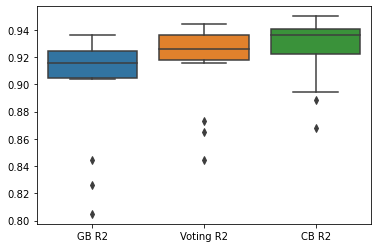

In [17]:
sns.boxplot(data=combo[['GB R2', 'Voting R2', 'CB R2']]);

In [19]:
combo.describe()

,fit_time,score_time,GB R2,test_neg_mae,fit_time,score_time,CB R2,test_neg_mae,fit_time,score_time,Voting R2,test_neg_mae
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.953331,0.003710,0.900513,-13859.586970,5.708228,0.008200,0.926071,-12157.235029,6.578311,0.009405,0.917169,-12623.924560
std,0.036240,0.002108,0.040623,797.087627,0.784656,0.004634,0.023954,805.073480,0.533624,0.002949,0.030946,787.027553
min,0.868820,0.002168,0.804937,-15644.900814,4.875887,0.003517,0.867974,-13993.303130,5.811602,0.005213,0.844184,-14442.226317
25%,0.932006,0.002281,0.904900,-14271.311291,5.072608,0.004894,0.922383,-12608.094096,6.050346,0.006928,0.918121,-13024.360441
50%,0.968135,0.002457,0.915860,-13658.674416,5.708811,0.007714,0.935921,-12078.089008,6.690489,0.009755,0.926040,-12505.703622
75%,0.977149,0.005283,0.924085,-13429.042422,5.878972,0.009930,0.940866,-11502.958567,6.928351,0.010851,0.935908,-12050.228510
max,0.997862,0.008336,0.935886,-12556.929643,8.028399,0.022111,0.949948,-11144.079503,7.462661,0.015041,0.944520,-11486.967892
